# Real Estate Price Recommender

This is a Linear Regression Machine Learning Model which uses data fetched from makaan.com to recommend appropriate price for the house. This model considers the factors like number of bathrooms, number of balconies, area, amneties and average distance to places such as schools to recommend appropriate value for the house.

This product is not ready for deployement and is just a prototype as the data I could gather was very limited. Feeding more data will imporve the accuracy of the model.

In [142]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
# importing modules 

In [143]:
np.random.seed(69)

In [144]:
housingData = pd.read_csv('data.csv')
# importing the housing data 

## Analysing Data

In [145]:
housingData.head()

,age,area,atmDistance,balconies,childrenPlayArea,clubHouse,garden,gym,hospitalDistance,joggingTrack,lift,powerBackup,price,restrauntDistance,schoolDistance,security,shoppingDistance,sportsFacility,status,swimmingPool
0,1,2800,0.392013,1,0,0,0,0,0.272617,0,0,0,9200000,0.648266,0.216812,0,0.555410,0,1,0
1,0,1500,0.340127,1,0,0,0,0,0.556446,0,0,0,4250000,0.596147,0.239233,0,0.389779,0,0,0
2,0,1500,0.000000,1,0,0,0,0,0.000000,0,0,0,4250000,0.000000,0.000000,0,0.000000,0,0,0
3,0,1500,0.000000,1,0,0,0,0,0.000000,0,0,0,4500000,0.000000,0.000000,0,0.000000,0,0,0
4,0,1500,0.000000,1,0,0,0,0,0.000000,0,0,0,4250000,0.000000,0.000000,0,0.000000,0,0,0


In [146]:
housingData.describe()

,age,area,atmDistance,balconies,childrenPlayArea,clubHouse,garden,gym,hospitalDistance,joggingTrack,lift,powerBackup,price,restrauntDistance,schoolDistance,security,shoppingDistance,sportsFacility,status,swimmingPool
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.00000,647.000000,647.000000,6.470000e+02,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,0.391036,2017.684699,0.221741,0.887172,0.047913,0.098918,0.026275,0.120556,0.229591,0.02473,0.040185,0.057187,7.095735e+06,0.245216,0.216870,0.044822,0.214874,0.018547,0.236476,0.035549
std,1.831133,1848.279592,0.306937,0.587227,0.213748,0.298783,0.160076,0.325863,0.254640,0.15542,0.196546,0.232379,1.832963e+07,0.377272,0.241880,0.207074,0.260065,0.135023,0.560323,0.185305
min,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,7.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1500.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.800000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1500.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.166201,0.00000,0.000000,0.000000,4.500000e+06,0.000000,0.216812,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2100.000000,0.340127,1.000000,0.000000,0.000000,0.000000,0.000000,0.371333,0.00000,0.000000,0.000000,8.000000e+06,0.387918,0.330241,0.000000,0.389779,0.000000,0.000000,0.000000
max,21.000000,20000.000000,2.691821,7.000000,1.000000,1.000000,1.000000,1.000000,1.135314,1.00000,1.000000,1.000000,4.200000e+08,3.091908,1.074679,1.000000,1.012796,1.000000,2.000000,1.000000


>### Observations
> - The house prices ranges from 7,00,000(7 lakhs) to 42,00,00,000(42 crore)
> - Most of the houses(50 percentile) of the houses are under 45,00,000(45 lakhs)
> - The mean price of houses in the dataset is 70,95,735

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'atmDistance'}>,
        <AxesSubplot:title={'center':'balconies'}>],
       [<AxesSubplot:title={'center':'childrenPlayArea'}>,
        <AxesSubplot:title={'center':'clubHouse'}>,
        <AxesSubplot:title={'center':'garden'}>,
        <AxesSubplot:title={'center':'gym'}>],
       [<AxesSubplot:title={'center':'hospitalDistance'}>,
        <AxesSubplot:title={'center':'joggingTrack'}>,
        <AxesSubplot:title={'center':'lift'}>,
        <AxesSubplot:title={'center':'powerBackup'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'restrauntDistance'}>,
        <AxesSubplot:title={'center':'schoolDistance'}>,
        <AxesSubplot:title={'center':'security'}>],
       [<AxesSubplot:title={'center':'shoppingDistance'}>,
        <AxesSubplot:title={'center':'sportsFacility'}>,
        <AxesSubplot:title={'center':'status

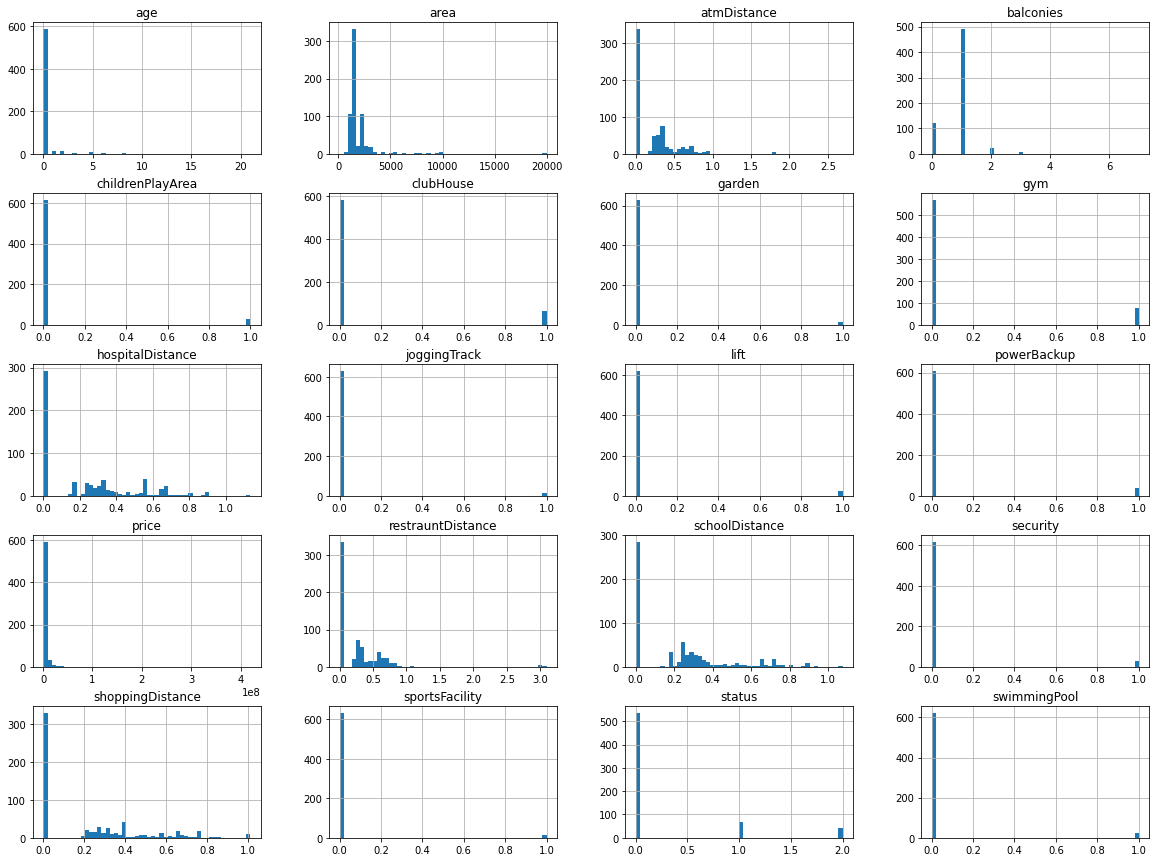

In [147]:
housingData.hist(bins=50, figsize=(20,15))

> ### Observations
> - The distance to places like schools and restraunt are unavailable in almost half of the datapoints
> - The area of half of the houses are around 2100
> - Almost 480 percentage of houses in the dataset has atleast 1 balcony
> - The house prices ranges from 7,00,000(7 lakhs) to 42,00,00,000(42 crore)
> - Most of the houses(50 percentile) of the houses are under 45,00,000(45 lakhs)
> - The mean price of houses in the dataset is 70,95,735
> - Amneties like lift, gym, swimming pool, etc.. causes to very high prices

## Train Test Splitting

In [148]:
def splitData(data, ratio:float):
    """Randomly Shuffles the data and splits it in the given ratio
    
    Keyword arguments:
    data -- The pandas DataFrame to be split
    ratio -- The ratio of the data to be splitted to min:0 max:1
    Return: Tuple of datas for training and testing
    """
    
    shuffle = np.random.permutation(len(data))
    i = int((len(data)*ratio))
    trainData = shuffle[:i]
    testData = shuffle[i:]
    return data.iloc[trainData], data.iloc[testData]

In [149]:
training, testing = splitData(housingData, 0.85)
# splitting the data for training and testing

In [150]:
f"There are {str(len(training))} sets of data for training the model and {str(len(testing))} sets of data for testing"

'There are 549 sets of data for training the model and 98 sets of data for testing'

In [151]:
trainingLabels = training['price']
testingLabels = testing['price']
# getting the labels for training data 

In [152]:
trainingFeatures = training
testingFeatures = testing
trainingFeatures.pop('price')
testingFeatures.pop('price')
# getting the features 

145     3550000
161     3900000
598     8000000
19      4250000
215     4250000
         ...   
439     4250000
602     8000000
619     4050000
203    14000000
54      3550000
Name: price, Length: 98, dtype: int64

In [153]:
from sklearn.linear_model import LinearRegression
# importing the linear regression algorithm 

In [154]:
model = LinearRegression()
# initiating the model 

In [155]:
model.fit(trainingFeatures, trainingLabels)
# training the model

LinearRegression()

In [157]:
prediction = model.predict(testingFeatures)

In [159]:
from sklearn.metrics import r2_score

r2_score(testingLabels, prediction)

-2.5634921914072946

In [173]:
Features = housingData
Labels = Features.pop('price')

In [174]:
model = LinearRegression()

In [175]:
model.fit(Features, Labels)

LinearRegression()

In [176]:
import pickle

with open("model.sav", "wb") as f:
    pickle.dump(model, f)